# EXAMPLE: Activated sludge system with pre-denitrification
Activated sludge systems with pre-denitrification makes use of the COD in the influent wastewater to carry out denitrification. An anoxic tank is followed by an aerobic tank. Water from the aerobic tank is recirculated back to the anoxic tank. Since nitrification is taking place in the aerobic tank, the recirculated water contains a lot nitrate, which is denitrified to dinitrogen gas in the anoxic tank. 

## Step 1: Define the influent
Instead of using the default influent, I will use an influent having a constant flow of 2400 m<sup>3</sup>/d, a biodegradable COD concentration of 200 g/m<sup>3</sup>, and an ammonium-nitrogen concentration of 50 g/m<sup>3</sup>. This type of constant influent can be defined as a python dictionary, as follows:

In [10]:
influent = {'Q':2400, 'S_s':200, 'S_NH4':50}

## Step 2: Set up the reactor
The reactor should have two compartment: an anoxic followed by an aerobic. I will use volumes of 400 m<sup>3</sup> for each compartment. This will result in hydraulic residence times of 4 hours in each compartment. I will set the volatile suspended solids (VSS) concentration to 3000 g/m<sup>3</sup> and the dissolved oxygen concentration in the aerobic compartment will be 4 g/m<sup>3</sup>.

First, I define the anoxic compartment. Note that I set area=0 because we don't have any biofilms in this reactor system. I also have to specify DO=0 since we have anoxic conditions. As influent, I add the influent variable we created above.

Then, I add the aerobic compartment. Here, I don't have to specify VSS again because that is assumed to the same as the previous compartment. 
Finally, I add a recirculation rate of 4800 m<sup>3</sup>/d from the second compartment to the first.

After these lines of code, the reactor system is saved in the variable r. I can check the reactor system using the method view_process(). I can also check the influent using the method view_influent().

<IPython.core.display.Javascript object>


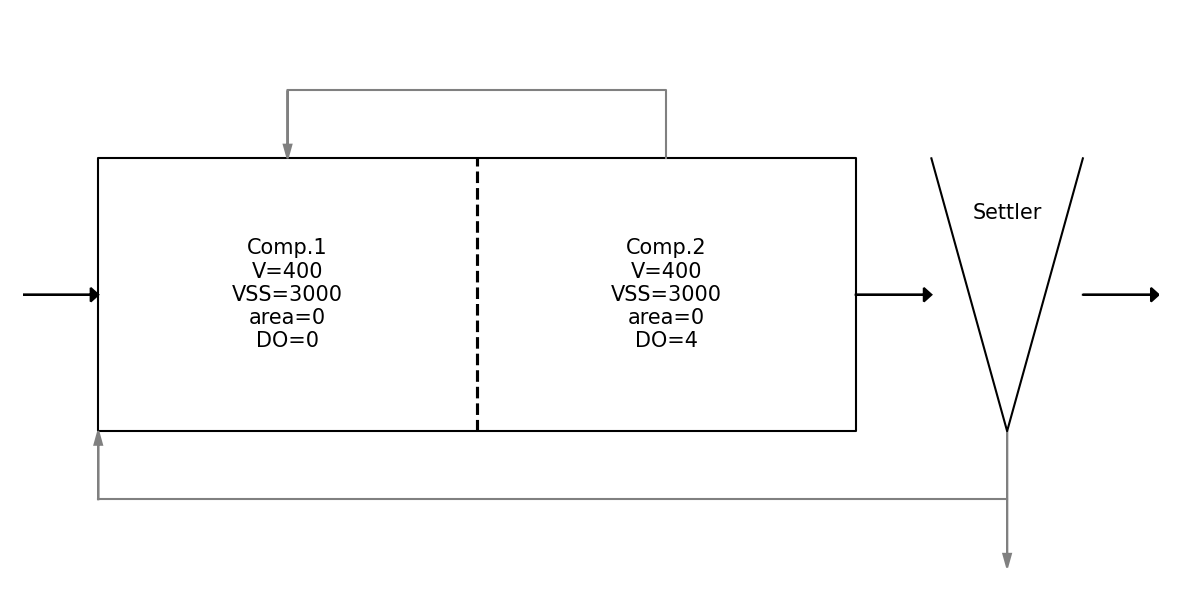

<IPython.core.display.Javascript object>


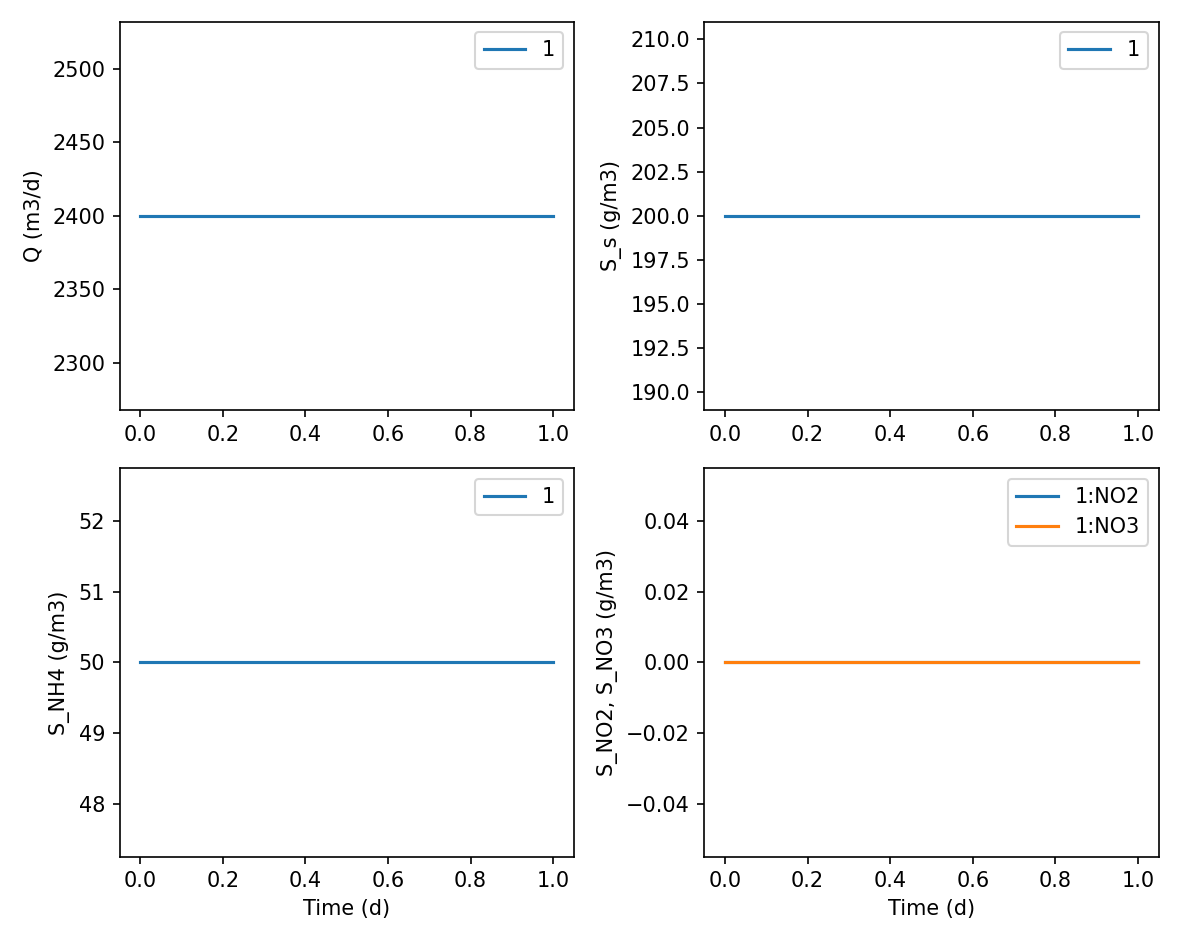

In [21]:
import biops
r = biops.ifas.Reactor(influent=influent, volume=400, DO=0, VSS=3000, area=0)
r.add_compartment(volume=400, DO=4, area=0)
r.add_recirculation(2, 1, 4800)
r.view_process()
r.view_influent()

## Step 3: Run simulation
Now, we want to investigate how the effluent concentrations and biomass concentrations change over time. Since the influent flow and concentrations are constant, we expect that the effluent and biomass will eventually reach steady state conditions.  
The following code will dynamically plot the concentrations of COD and nitrogen, as well as biomass composition.

<IPython.core.display.Javascript object>


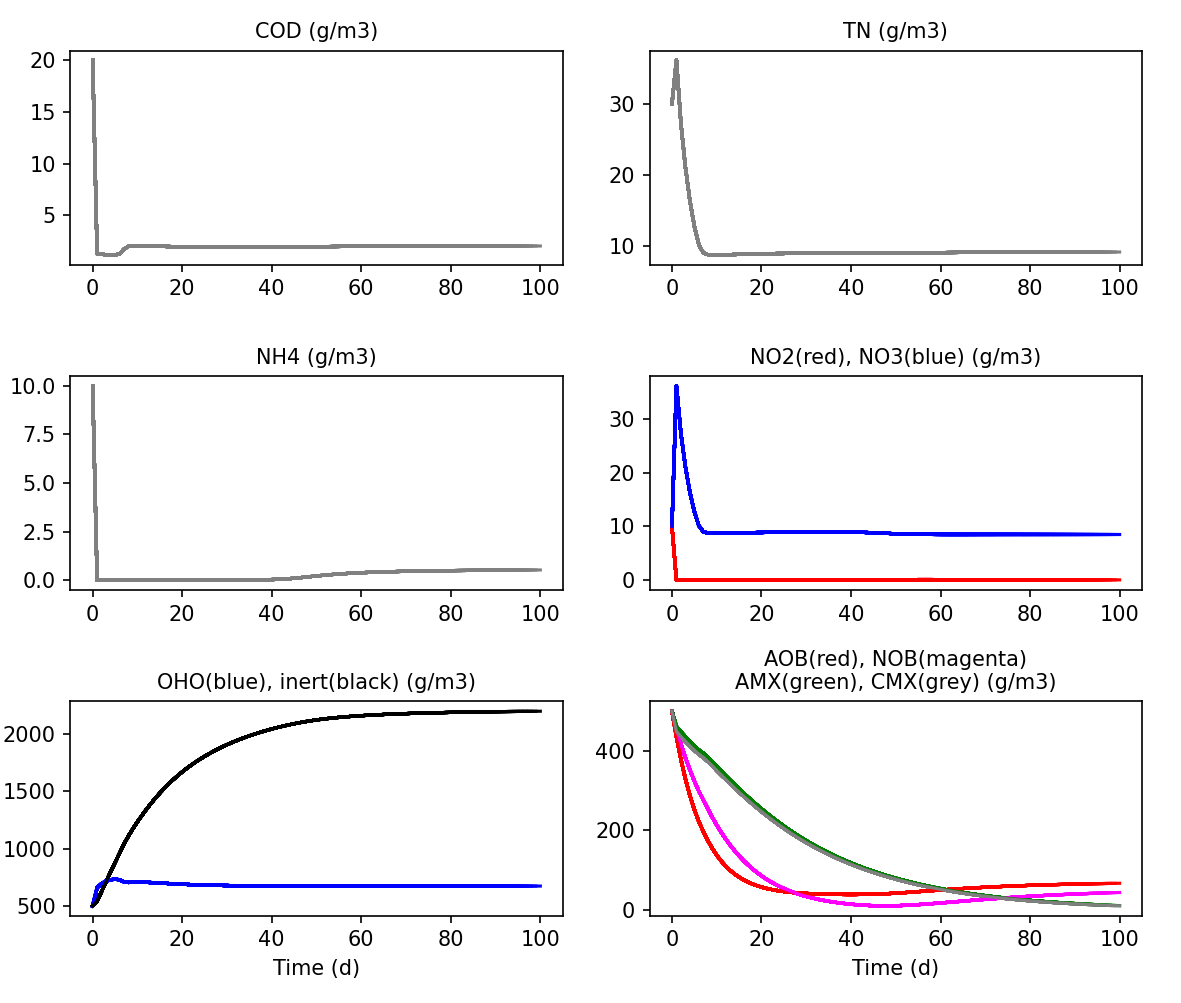

In [22]:
%matplotlib notebook
import matplotlib.pyplot as plt
import time

#Here we set up a multi-panel figure to plot COD, total nitrogen (TN), individual nitrogen species, and biomass composition 
plt.rcParams.update({'font.size':10}) #Defines fontsize to use for the axes in the figure
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(20/2.54, 17/2.54)) #Defines number of panels and figure size
ax[0, 0].set_title('COD (g/m3)', fontsize=10) 
ax[0, 1].set_title('TN (g/m3)', fontsize=10)
ax[1, 0].set_title('NH4 (g/m3)', fontsize=10)
ax[1, 1].set_title('NO2(red), NO3(blue) (g/m3)', fontsize=10)
ax[2, 0].set_title('OHO(blue), inert(black) (g/m3)', fontsize=10)
ax[2, 1].set_title('AOB(red), NOB(magenta)\nAMX(green), CMX(grey) (g/m3)', fontsize=10)

ax[2, 0].set_xlabel('Time (d)')
ax[2, 1].set_xlabel('Time (d)')
fig.tight_layout()

#Here we run a loop for 100 time steps. The default setting is that each time step is one day, so this corresponds to a bit more than three months
for i in range(100):
    r.calculate() #This runs the calculation for one time step

    #In the first panel we plot influent and effluent COD concentrations
    ax[0, 0].plot(r.bulklogger['2']['Conc'].index, r.bulklogger['2']['Conc']['S_s'], color='grey')

    #In the second panel we plot influent and effluent TN concentrations
    ax[0, 1].plot(r.bulklogger['2']['Conc'].index, r.bulklogger['2']['Conc'][['S_NH4', 'S_NO2', 'S_NO3']].sum(axis=1), color='grey')

    #In the third panel we plot individual N species in the effluent
    ax[1, 0].plot(r.bulklogger['2']['Conc'].index, r.bulklogger['2']['Conc']['S_NH4'], color='grey')

    #In the fourth panel we plot individual N species in the effluent
    ax[1, 1].plot(r.bulklogger['2']['Conc'].index, r.bulklogger['2']['Conc']['S_NO2'], color='red')
    ax[1, 1].plot(r.bulklogger['2']['Conc'].index, r.bulklogger['2']['Conc']['S_NO3'], color='blue')

    #In the fifth and sixth panels we plot biomass components
    ax[2, 0].plot(r.bulklogger['2']['Conc'].index, r.bulklogger['2']['Conc']['X_OHO'], color='blue')
    ax[2, 0].plot(r.bulklogger['2']['Conc'].index, r.bulklogger['2']['Conc']['X_I'], color='black')

    ax[2, 1].plot(r.bulklogger['2']['Conc'].index, r.bulklogger['2']['Conc']['X_AOB'], color='red')
    ax[2, 1].plot(r.bulklogger['2']['Conc'].index, r.bulklogger['2']['Conc']['X_NOB'], color='magenta')
    ax[2, 1].plot(r.bulklogger['2']['Conc'].index, r.bulklogger['2']['Conc']['X_AMX'], color='green')
    ax[2, 1].plot(r.bulklogger['2']['Conc'].index, r.bulklogger['2']['Conc']['X_CMX'], color='grey')

    fig.canvas.draw()
    time.sleep(0.05) #This is to slow down the calculations a bit so we can see the figure dynamically updating


Ok, so we see that the lines are approaching steady state. We have a lot of inert biomass and OHO. We also have some AOB and NOB, but as expected AMX and CMX do not survive in the system.  
Most of the COD and ammonium are removed, but we have some nitrate in the effluent.